In [1]:
from nblogger import logger
import numpy as np
import matplotlib.pyplot as plt
import parameters
from parameters import ParameterSet

import theano_shim as shim
import sinn
#import sinn.histories as histories
from sinn.histories import Spiketrain, Series
import sinn.iotools as iotools
import sinn.analyze as anlz
from sinn.analyze.heatmap import HeatMap
#from sinn.analyze.heatmap import HeatMap
#import sinn.optimize.gradient_descent as gd

import core
import generate_input
import generate_spikes
import generate_activity

np.set_printoptions(precision=5, suppress=True)
%matplotlib inline

2017-09-01 21:02:43,777 - sinn.analyze.stylelib.color_schemes - WARNING - [monochrome_palette]: value was greater than 1 and was clipped.


In [2]:
input_params = parameters.ParameterSet("input.params")

In [3]:
Ihist = Series.from_raw(io.loadraw(
        core.get_pathname(core.input_subdir, input_params)))

(0, 4)

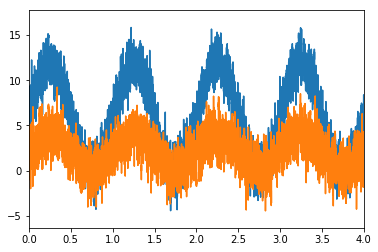

In [7]:
anlz.plot(anlz.smooth(Ihist, 10))
plt.xlim((0, 4))

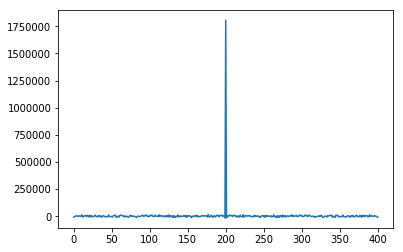

In [5]:
anlz.plot(core.crosscorrelation(Ihist.get_trace()[:,0], 
                                Ihist.get_trace()[:,0], 
                                maxlag=200))

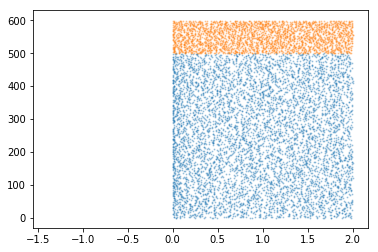

In [3]:
spikes_params = parameters.ParameterSet("spikes.params")
spikes_params.initializer = 'silent'

shist = Spiketrain.from_raw(io.loadraw(
    core.get_pathname(core.spikes_subdir, spikes_params)))

anlz.plot(shist, start=0, stop=-1)

In [20]:
activity_params = core.load_parameters("activity.params")
activity_params.spikes.initializer = spikes_params.initializer

Ahist = Series.from_raw(io.loadraw(
    core.get_pathname(core.activity_subdir, activity_params)))

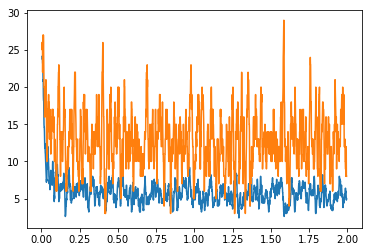

In [23]:
anlz.plot(anlz.smooth(Ahist, 10))

In [7]:
core.get_pathname("", activity_params)

'data/d17073fd46e45e85cc6876554a716ae6c9080b36'

In [8]:
activity_params.initializer

'stationary'

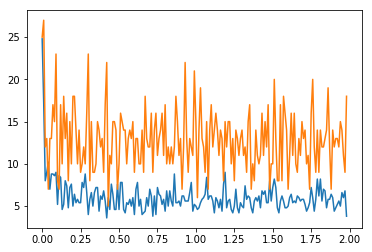

In [8]:
Ahist = core.compute_spike_activity(shist, 0.001)

anlz.plot(anlz.subsample(Ahist, 10))

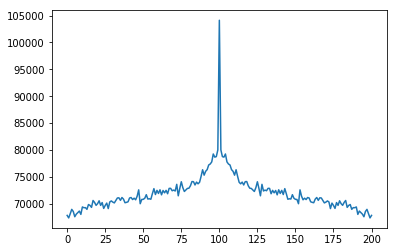

In [4]:
plt.plot(core.crosscorrelation(Ahist[:][:,0], Ahist[:][:,0], maxlag=100))

In [5]:
spikes_params.initializer = 'stationary'

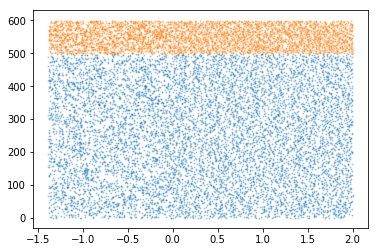

In [6]:
shist_stat = Spiketrain.from_raw(io.loadraw(
    core.get_pathname(core.spikes_subdir, spikes_params)))

anlz.plot(shist_stat, start=0, stop=-1)

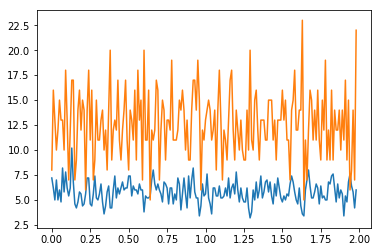

In [12]:
Ahist_stat = core.compute_spike_activity(shist_stat, 0.001)

anlz.plot(anlz.subsample(Ahist_stat, 10))

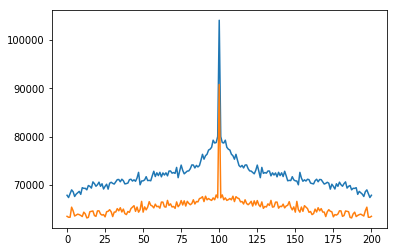

In [13]:
plt.plot(core.crosscorrelation(Ahist[:][:,0], Ahist[:][:,0], maxlag=100))
plt.plot(core.crosscorrelation(Ahist_stat[:][:,0], Ahist_stat[:][:,0], maxlag=100))

In [2]:
logL = []

In [7]:
L = [0, 0]

In [3]:
logLparams = parameters.ParameterSet("params/loglsweep.params")

In [42]:
#logLparams

In [20]:
logLparams.input = ParameterSet("params/sin-input.params")
logLparams.data.params.input = ParameterSet("params/sin-input.params")

In [21]:
logLparams = core._params_to_arrays(logLparams)

In [22]:
core.get_pathname("likelihood", logLparams)

'data/likelihood/f2d0aa6d5a056a2c24da3f399c42861aa6fa1cc2'

In [33]:
%ls data/likelihood

7fbcba66a3a5dc47e76f1cb44df121ddde2c1ae8.sin
7fbcba66a3a5dc47e76f1cb44df121ddde2c1ae8.sir
8a5104992a8359ecc2fbe6a54443447b4571325c.sin
8a5104992a8359ecc2fbe6a54443447b4571325c.sir
c2fb9845247afb27cdfc573dd6806f23c1d5d082.sin
c2fb9845247afb27cdfc573dd6806f23c1d5d082.sir
e08f6a7f87a16584fa31730ae4b7fc18e7e8ff20.sin
e08f6a7f87a16584fa31730ae4b7fc18e7e8ff20.sir


In [4]:
# coarse
logL[0] = HeatMap.from_raw(
    iotools.loadraw("data/likelihood/7fbcba66a3a5dc47e76f1cb44df121ddde2c1ae8.sir")) )

In [37]:
# coarse
logL[1] = HeatMap.from_raw(
    iotools.loadraw("data/likelihood/c2fb9845247afb27cdfc573dd6806f23c1d5d082.sir"))

In [38]:
for hm in logL:
    hm.set_ceil(hm.max())
    hm.set_floor(hm.max()-100)

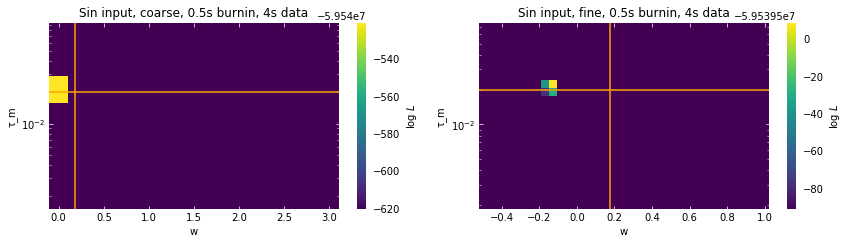

In [44]:
plt.figure(figsize=(12, 3.5))
#plt.suptitle("Sinusoïdal input, 0.5s burnin, 4s data")

plt.subplot(1,2,1)
anlz.plot(logL[0])
plt.title("Sin input, coarse, 0.5s burnin, 4s data")
plt.axhline(logLparams.model.params.τ_m[1], color='orange')
plt.axvline(logLparams.model.params.w[0,0], color='orange')

plt.subplot(1,2,2)
anlz.plot(logL[1])
plt.title("Sin input, fine, 0.5s burnin, 4s data")
plt.axhline(logLparams.model.params.τ_m[1], color='orange')
plt.axvline(logLparams.model.params.w[0,0], color='orange')
plt.tight_layout()

None

In [8]:
L.append(core.exploglikelihood(logL[0]))

NameError: name 'HeatMap' is not defined